In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


# See the methodlogy used

In [41]:
#pip install PyPDF2

In [42]:
# importing required modules
import PyPDF2
  
# creating a pdf file object
pdfFileObj = open('/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  
# printing number of pages in pdf file
print(pdfReader.numPages)
  
# creating a page object
pageObj = pdfReader.getPage(0)
  
# extracting text from page
print(pageObj.extractText())
  
# closing the pdf file object
pdfFileObj.close()

1
2022 Kaggle DS & ML Survey
Methodology:
●
Survey data collection
○
The full list of questions that were asked (along with the provided answer choices) can be
found in the file: kaggle_survey_2022_answer_choices.pdf.  The file contains footnotes
that describe exactly which questions were asked to which respondents. Respondents
with the most experience were asked the most questions.  For example, students and
unemployed persons were not asked questions about their employer.  Likewise,
respondents that do not write code were not asked questions about writing code. For
more detail, see the footnotes associated with each question in the document
kaggle_survey_2022_answer_choices.pdf.
○
The survey was live from 08/16/2022 to 09/16/2022. We allowed respondents to
complete the survey at any time during that window.  An invitation to participate in the
survey was sent to the entire Kaggle community (anyone opted-in to the Kaggle Email
List) via email.  The survey was also promoted on the Kagg

As shown in the PDF file read that all ethics and privacy for respondents was complied and repondent bious was kept at minimum lenght by ensuring only compelte answers by respondents were processed

# Check Answer choices

In [43]:
# importing required modules
import PyPDF2
  
# creating a pdf file object
pdfFileObj = open('/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  
# printing number of pages in pdf file
print(pdfReader.numPages)
  
# creating a page object
pageObj = pdfReader.getPage(0)
  
# extracting text from page
print(pageObj.extractText())
  
# closing the pdf file object
pdfFileObj.close()

18
2022 Kaggle DS & ML Survey
List of Questions and Answer Choices
C o n t e x t :
The goal of the
Kaggle DS & ML survey
is
to better understand current trends in data
science and machine learning. This document describes the questions and answer choices that
were presented to survey respondents.
To ﬁnd the list of questions and answer choices from previous years (along with the raw data),
you can visit the following links:
2017
,
2018
,
2019
,
2020
,
2021
,
2022
.


# Explore the Data 

In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [45]:
df.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

In [46]:
df.iloc[0]

Duration (in seconds)                                Duration (in seconds)
Q2                                             What is your age (# years)?
Q3                                  What is your gender? - Selected Choice
Q4                               In which country do you currently reside?
Q5                       Are you currently a student? (high school, uni...
                                               ...                        
Q44_8                    Who/what are your favorite media sources that ...
Q44_9                    Who/what are your favorite media sources that ...
Q44_10                   Who/what are your favorite media sources that ...
Q44_11                   Who/what are your favorite media sources that ...
Q44_12                   Who/what are your favorite media sources that ...
Name: 0, Length: 296, dtype: object

In [47]:
df.columns=df.iloc[0]

In [48]:
df

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Scienc

In [49]:
# Drop first row
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

## Convert first Row as header

In [50]:
df

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle 

## We replace the NaN values with modes as they are mostly categorical forms of data 

In [51]:
df.isnull().sum()

0
Duration (in seconds)                                                                                                                                                                                      0
What is your age (# years)?                                                                                                                                                                                0
What is your gender? - Selected Choice                                                                                                                                                                     0
In which country do you currently reside?                                                                                                                                                                  0
Are you currently a student? (high school, university, or graduate)                                                                                                               

<AxesSubplot:xlabel='0', ylabel='0'>

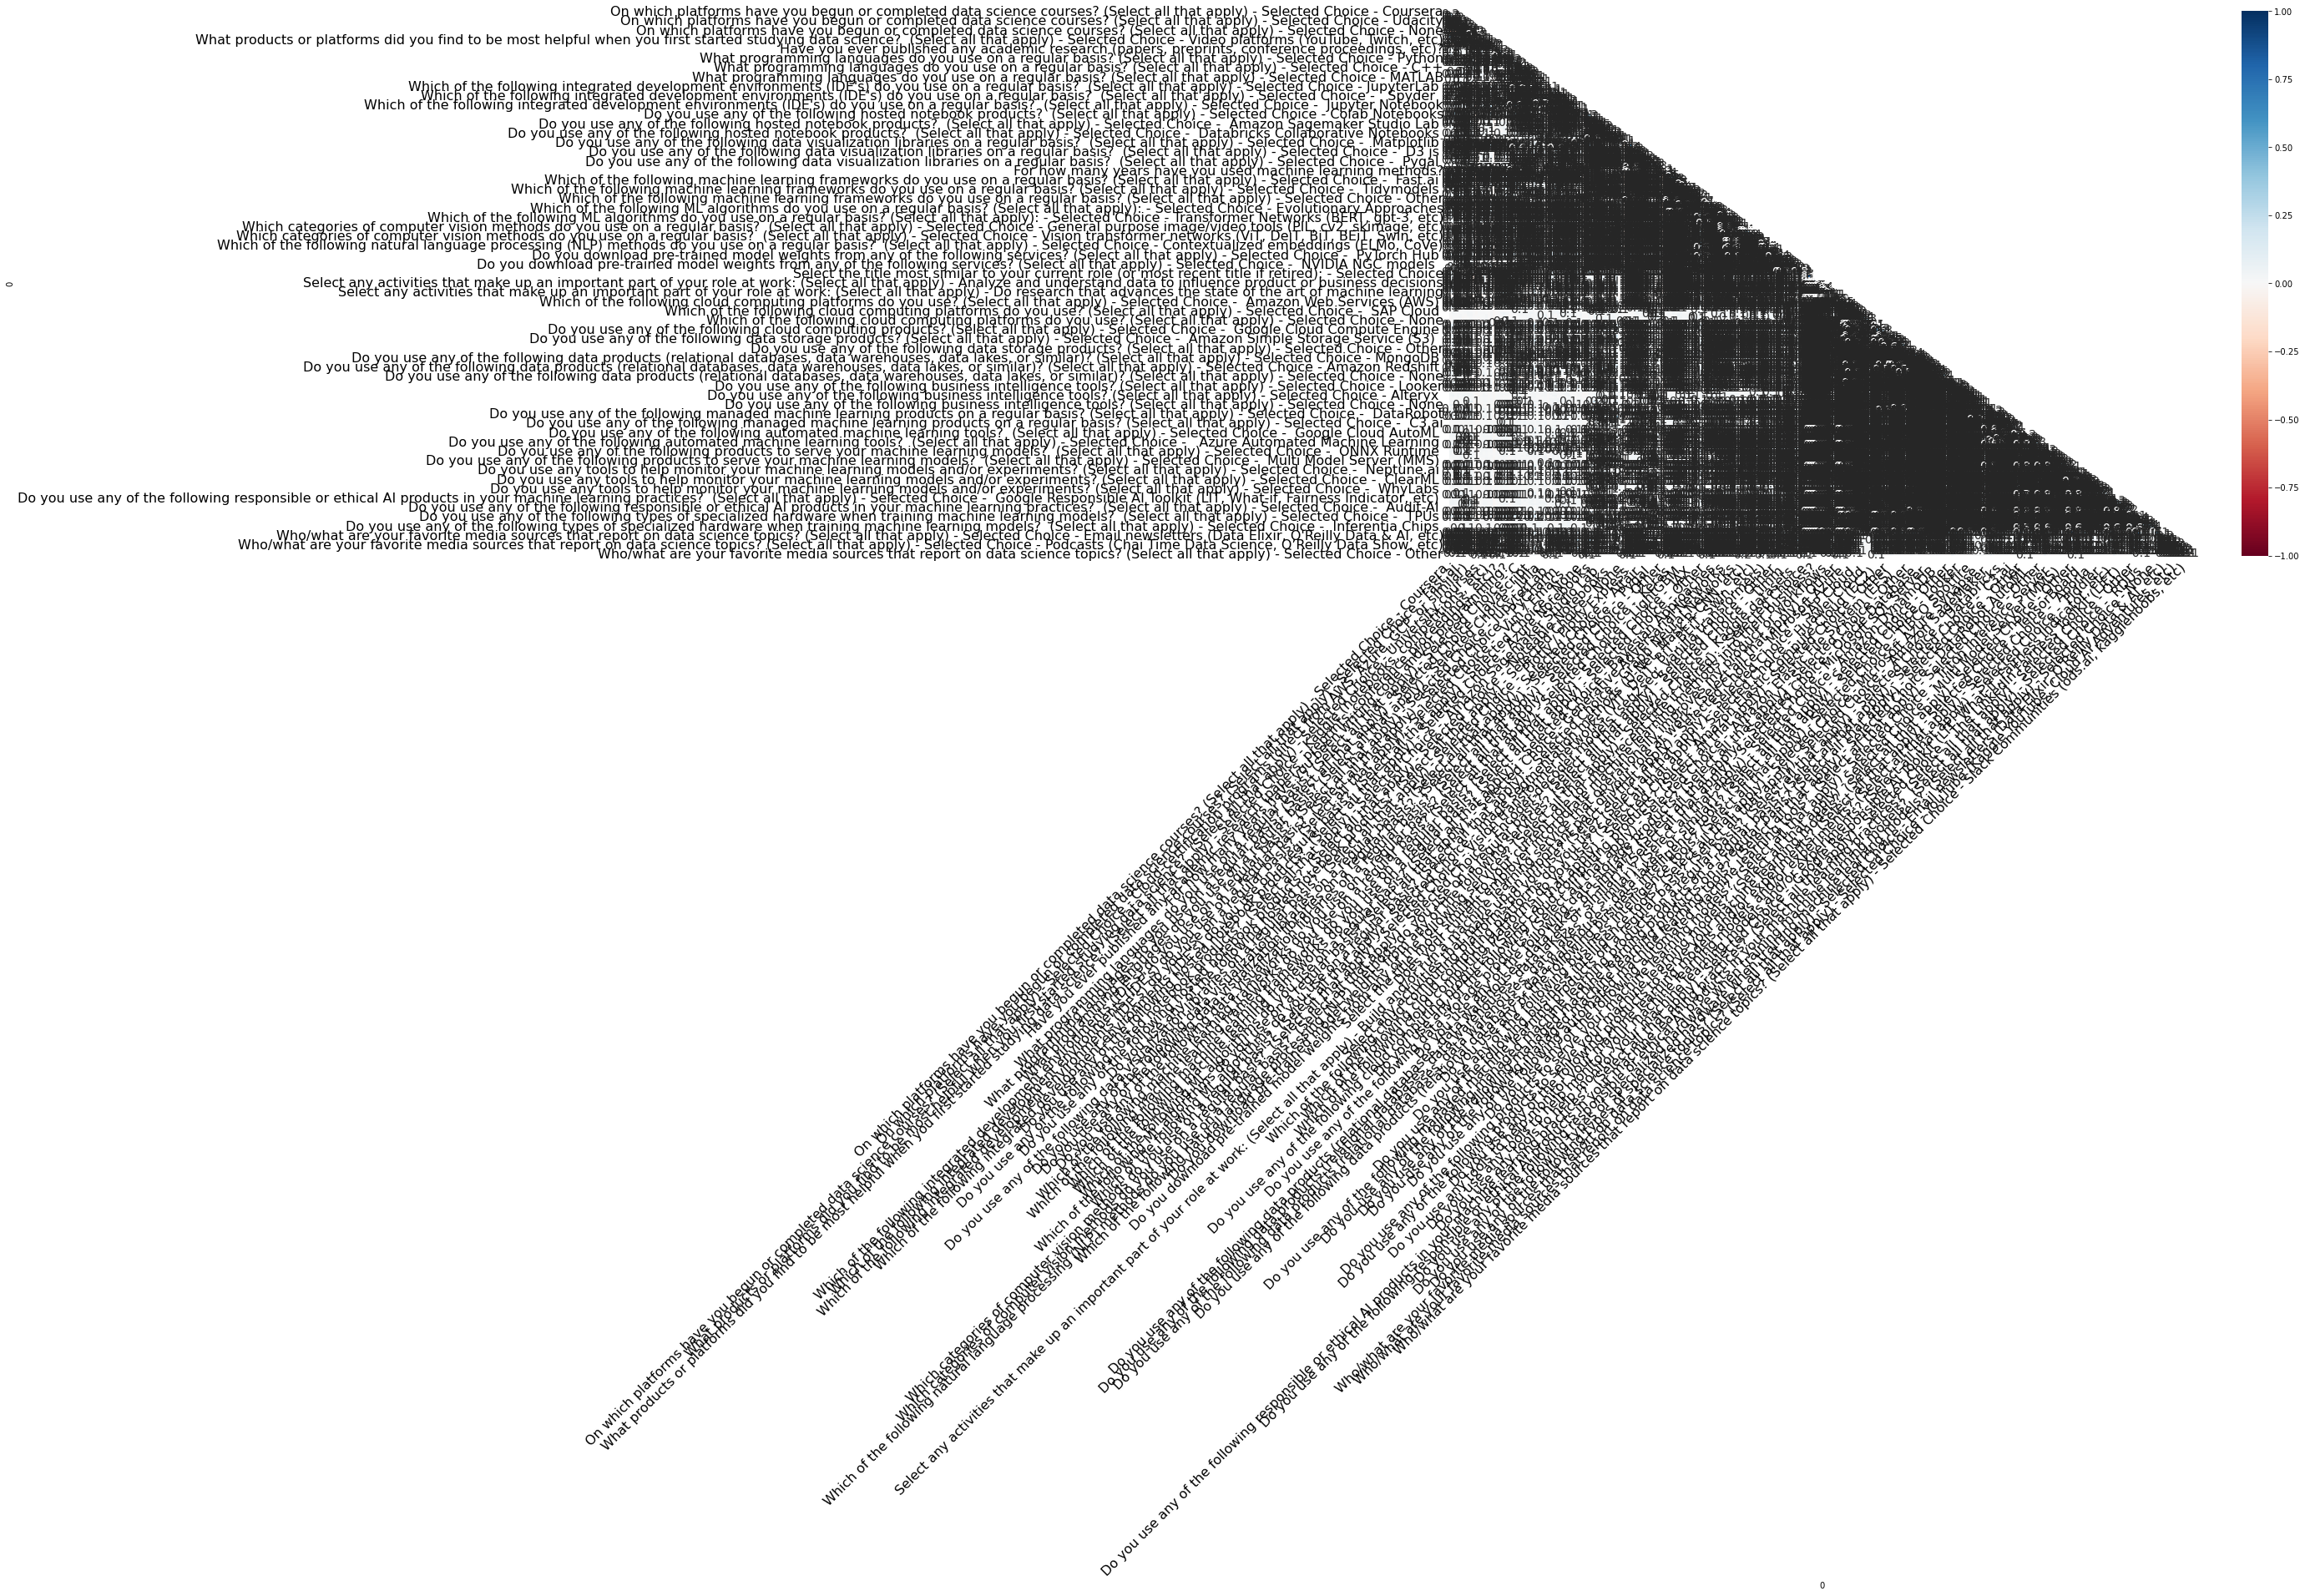

In [52]:
import missingno as mn
mn.heatmap(df)

## OKAY WOULD YOU LOOK AT THAT 